<a href="https://colab.research.google.com/github/Alwin1847207/KNN-vs-Feature_Scaling/blob/master/ML_CIA2_1847207.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question

ML CIA 2 - 1847207 - September 2 2020

Question : Implementation Based Interpretation of given problem

Demonstrate the Impact of Feature scaling on accuracy in KNN algorithm for heart_disease dataset. Include at least one plot/graph to visualize the results. Provide conceptual interpretation of the results. Use heart disease dataset.

Dataset URL : https://drive.google.com/file/d/1fDiD8p6Tkc-jY61Q4-mB_x8P7FCibnOT/view?usp=sharing

# Theoretical background

**Feature scaling**

Feature scaling is the method used to normalize the features (attributes) in the dataset. It is also called normalization and is a data preperation step. The aim of feature scalling is to standardize the features present in the dataset, to a fixed range.

Two main techniques to perform the feature scalling includes


1.  **Min-max Scaling** - It uses the minimum and maximum values of a feature to rescale values within a range - Min-Max Scaling in Scikit-Learn with **MinMaxScaler()** method.
2.   **Standard Scaling** - it works by rescaling features to be approximately standard normally distributed - in Scikit-Learn you can use StandardScaler() method.
3. **Robust Scaling** - Robust Scaling which is commonly used to overcome the presence of outliers in our data - In Scikit-Learn, we do this using the RobustScaler() method.


**KNN algorithm**
KNN algorithm is a classification algorithm in Machine Learning. It belongs to the supervised learning domain and finds intense application in pattern recognition, data mining and intrusion detection.

Algorithm
Let m be the number of training data samples. Let p be an unknown point.

    Store the training samples in an array of data points arr[]. This means each element of this array represents a tuple (x, y).

    for i=0 to m:
      Calculate Euclidean distance d(arr[i], p).

    Make set S of K smallest distances obtained. Each of these distances corresponds to an already classified data point.
    
    Return the majority label among S.


**Impact of Feature scaling on accuracy in KNN algorithm**

Features in the dataset are having high importance in KNN. In KNN, the distance of the vectors, and the range of values in each feature drastically influence the prediction results.

**What to do ?**

To prove the Impact of feature scalling on the accuracy results of the KNN algorithm, with the help of heart_disease dataset.

**Dataset Understanding**

This database contains 14 attributes. 
The attributes are 

1. age
2. sex
3. chest pain type (4 values) 
4. resting blood pressure 
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved 
9. exercise induced angina 
10. oldpeak = ST depression induced by exercise relative to rest 
11. the slope of the peak exercise ST segment 
12. number of major vessels (0-3) colored by flourosopy 
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

The "goal" field refers to the presence of heart disease in the patient. 

# Implemention

## Importing and understanding the data

Importing required libraries

In [136]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Reading the dataset

In [86]:
data_set = pd.read_csv('heart_disease.csv')

Finding the shape of the dataset

In [87]:
print(data_set.shape)

(303, 14)


Describing the dataset

In [88]:
data_set.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Finding te types of each attributes

In [89]:
print(data_set.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


Displaying the coloums - feature names in the dataset

In [90]:
print(data_set.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


Identifing the missing values

In [91]:
data_set.isna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [92]:
data_set.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Displaying the top results in the dataset

In [93]:
print(data_set.head(10))

   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1
5   57    1   0       140   192    0  ...      0      0.4      1   0     1       1
6   56    0   1       140   294    0  ...      0      1.3      1   0     2       1
7   44    1   1       120   263    0  ...      0      0.0      2   0     3       1
8   52    1   2       172   199    1  ...      0      0.5      2   0     3       1
9   57    1   2       150   168    0  ...      0      1.6      2   0     2       1

[10 rows x 14 columns]


**Concusion**
From the understanding of the dataset, we could observe that the arrtibutes **age,  trestbps, chol, thalach, oldpeak** are of different units. So i would like to applay the scalling on these attributes and analyse the impact on the accuracy of the KNN algorithm.

## Applying KNN algorithm without Feature Scalling

In [94]:
#Create copy of dataset.
df_model = data_set.copy()

In [95]:
#Create KNN Object
knn = KNeighborsClassifier()

In [96]:
#Create x and y variable
x = df_model.drop(columns=['target'])
y = df_model['target']

In [97]:
#Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [98]:
#Training the model
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [99]:
#Predict testing set
y_pred = knn.predict(x_test)

In [100]:
#Check performance using accuracy
print("Accuracy : ",accuracy_score(y_test, y_pred))
knn_acc = accuracy_score(y_test, y_pred)

Accuracy :  0.5737704918032787


In [101]:
#Check performance using roc
print("ROC : ",roc_auc_score(y_test, y_pred))
knn_roc = roc_auc_score(y_test, y_pred)

ROC :  0.5655555555555556


## Applying KNN algorithm with Feature Scalling technique : StandardScaler

In [102]:
#Create copy of dataset.
df_model = data_set.copy()

In [103]:
#Rescaling features age, trestbps, chol, thalach, oldpeak.
scaler = StandardScaler()

In [104]:
features = [['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
for feature in features:
    df_model[feature] = scaler.fit_transform(df_model[feature])

In [105]:
#Create KNN Object
knn = KNeighborsClassifier()

In [106]:
#Create x and y variable
x = df_model.drop(columns=['target'])
y = df_model['target']

In [107]:
#Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [108]:
#Training the model
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [109]:
#Predict testing set
y_pred = knn.predict(x_test)

In [110]:
#Check performance using accuracy
print("Accuracy : ",accuracy_score(y_test, y_pred))
knn_s_acc = accuracy_score(y_test, y_pred)

Accuracy :  0.8524590163934426


In [111]:
#Check performance using roc
print("ROC : ",roc_auc_score(y_test, y_pred))
knn_s_roc = roc_auc_score(y_test, y_pred)

ROC :  0.8383333333333333


## Applying KNN algorithm with Feature Scalling technique : Min-Max Scaling

In [112]:
#Create copy of dataset.
df_model = data_set.copy()

In [113]:
#Rescaling features age, trestbps, chol, thalach, oldpeak.
scaler = MinMaxScaler()

In [114]:
features = [['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
for feature in features:
    df_model[feature] = scaler.fit_transform(df_model[feature])

In [115]:
#Create KNN Object
knn = KNeighborsClassifier()

In [116]:
#Create x and y variable
x = df_model.drop(columns=['target'])
y = df_model['target']

In [117]:
#Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [118]:
#Training the model
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [119]:
#Predict testing set
y_pred = knn.predict(x_test)

In [120]:
#Check performance using accuracy
print("Accuracy : ",accuracy_score(y_test, y_pred))
knn_m_acc = accuracy_score(y_test, y_pred)

Accuracy :  0.8688524590163934


In [121]:
#Check performance using roc
print("ROC : ",roc_auc_score(y_test, y_pred))
knn_m_roc = roc_auc_score(y_test, y_pred)

ROC :  0.8705555555555555


## Applying KNN algorithm with Feature Scalling technique : RobustScaler

In [122]:
#Create copy of dataset.
df_model = data_set.copy()

In [123]:
#Rescaling features age, trestbps, chol, thalach, oldpeak.
scaler = RobustScaler()

In [124]:
features = [['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]

for feature in features:
    df_model[feature] = scaler.fit_transform(df_model[feature])

In [125]:
#Create KNN Object
knn = KNeighborsClassifier()

In [126]:
#Create x and y variable
x = df_model.drop(columns=['target'])
y = df_model['target']

In [127]:
#Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [128]:
#Training the model
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [129]:
#Predict testing set
y_pred = knn.predict(x_test)

In [130]:
#Check performance using accuracy
print("Accuracy : ",accuracy_score(y_test, y_pred))
knn_r_acc = accuracy_score(y_test, y_pred)

Accuracy :  0.8360655737704918


In [131]:
#Check performance using roc
print("ROC : ",roc_auc_score(y_test, y_pred))
knn_r_roc = roc_auc_score(y_test, y_pred)

ROC :  0.8183333333333332


## Comparing the different outputs - Conclusion

KNN over the heart_disease dataset, is been carried over with the following scenerios

1. KNN without feature scalling
2. KNN with Standard Scaler
3. KNN with Min-Max Scaler
4. KNN with Robust Scaler

The accuracy and roc curve for each of the following scenrios is been plotted below

In [132]:
print("KNN without feature scalling : Acc - ", knn_acc,"ROC -",knn_roc)

KNN without feature scalling : Acc -  0.5737704918032787 ROC - 0.5655555555555556


In [133]:
print("KNN with standard scalling : Acc - ", knn_s_acc,"ROC -",knn_s_roc)

KNN with standard scalling : Acc -  0.8524590163934426 ROC - 0.8383333333333333


In [134]:
print("KNN with min max scalling : Acc - ", knn_m_acc,"ROC -",knn_m_roc)

KNN with min max scalling : Acc -  0.8688524590163934 ROC - 0.8705555555555555


In [135]:
print("KNN with robust scalling : Acc - ", knn_r_acc,"ROC -",knn_r_roc)

KNN with robust scalling : Acc -  0.8360655737704918 ROC - 0.8183333333333332


**Ploating Accuracy score obtained**

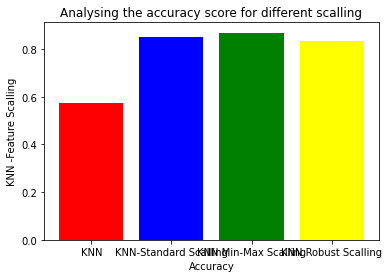

In [146]:
accuracy = [knn_acc,knn_s_acc,knn_m_acc,knn_r_acc]

labels = ['KNN','KNN-Standard Scalling','KNN Min-Max Scalling','KNN Robust Scalling']

# plotting a bar chart 
plt.bar(labels,accuracy,width = 0.8, color = ['red', 'blue', 'green', 'yellow']) 
  
# naming the x-axis 
plt.xlabel('Accuracy') 
# naming the y-axis 
plt.ylabel('KNN -Feature Scalling') 
# plot title 
plt.title('Analysing the accuracy score for different scalling') 
  
# function to show the plot 
plt.show() 

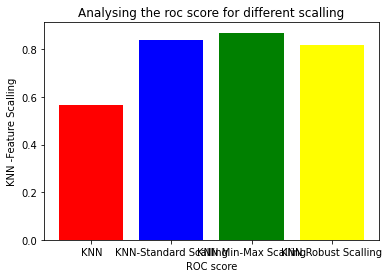

In [147]:
accuracy = [knn_roc,knn_s_roc,knn_m_roc,knn_r_roc]

labels = ['KNN','KNN-Standard Scalling','KNN Min-Max Scalling','KNN Robust Scalling']

# plotting a bar chart 
plt.bar(labels,accuracy,width = 0.8, color = ['red', 'blue', 'green', 'yellow']) 
  
# naming the x-axis 
plt.xlabel('ROC score') 
# naming the y-axis 
plt.ylabel('KNN -Feature Scalling') 
# plot title 
plt.title('Analysing the roc score for different scalling') 
  
# function to show the plot 
plt.show() 

**Conclusion**

WE COULD SEE THAT FEATURE SCALLING HAVE SIGNIFICANT RELATIONASHIP WITH IMPROVING THE ACCURACY OF KNN ALGORITHM WITH RESPECT TO HEART_DISEASE DATASET

AMONG THE DIFFERENT SCALLING TECHNIQUES USED - MIN-MAX SCALLING COULD YIELD MORE ACCURACY IN THE GIVEN SCENERIO